<a href="https://colab.research.google.com/github/RENU-101/Cotton-Plant-Disease-Detection-Using-Deep-Learning/blob/main/Copy_of_plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

#for accuracy and loss graph
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
keras.__version__

In [ ]:
train_data_path = "/content/drive/MyDrive/ML_project/dataset/train"
validation_data_path = "/content/drive/MyDrive/ML_project/dataset/val"

In [ ]:
#show augmented images
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
#This is the augmentation configuration we will use for training
#it generate more images using below parameters

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


In [ ]:
#This is a generator that will read pictures found in 
#At train_data_path, and indifinitely generate
#batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, #this is target directry
                                                     target_size=(150,150), # all images will be resized to 150x150
                                                     batch_size=32,
                                                     class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels



Found 1949 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')
 
 

Found 311 images belonging to 4 classes.


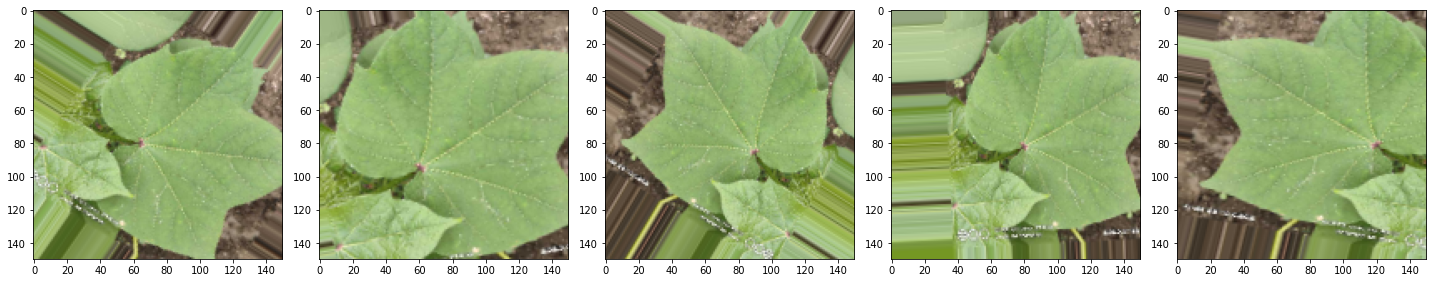

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/MyDrive/ML_project/v3_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
 

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])



 

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=80,
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 



Epoch 1/80
61/61 [==============================] - 645s 10s/step - loss: 1.2911 - accuracy: 0.4235 - val_loss: 1.1092 - val_accuracy: 0.4984

Epoch 00001: val_accuracy improved from -inf to 0.49839, saving model to /content/drive/MyDrive/ML_project/v3_pred_cott_dis.h5
Epoch 2/80
61/61 [==============================] - 109s 2s/step - loss: 1.0617 - accuracy: 0.5437 - val_loss: 0.8738 - val_accuracy: 0.6367

Epoch 00002: val_accuracy improved from 0.49839 to 0.63666, saving model to /content/drive/MyDrive/ML_project/v3_pred_cott_dis.h5
Epoch 3/80
61/61 [==============================] - 109s 2s/step - loss: 0.9257 - accuracy: 0.6289 - val_loss: 0.9542 - val_accuracy: 0.5659

Epoch 00003: val_accuracy did not improve from 0.63666
Epoch 4/80
61/61 [==============================] - 109s 2s/step - loss: 0.8804 - accuracy: 0.6705 - val_loss: 0.7777 - val_accuracy: 0.6849

Epoch 00004: val_accuracy improved from 0.63666 to 0.68489, saving model to /content/drive/MyDrive/ML_project/v3_pred_c

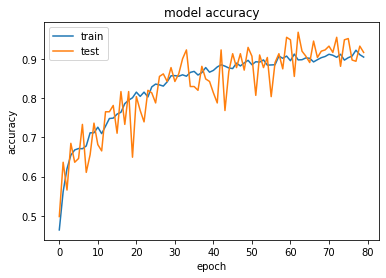

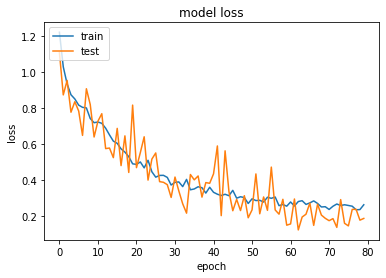

{'accuracy': [0.4643406867980957,
  0.5618265867233276,
  0.6203181147575378,
  0.6546947360038757,
  0.6680349111557007,
  0.6716264486312866,
  0.6711133718490601,
  0.6782965660095215,
  0.7116469740867615,
  0.7116469740867615,
  0.7260133624076843,
  0.7095946669578552,
  0.7285787463188171,
  0.7480759620666504,
  0.7491021156311035,
  0.7593637704849243,
  0.7639815211296082,
  0.7860441207885742,
  0.7947665452957153,
  0.8009235262870789,
  0.8152899146080017,
  0.8045151233673096,
  0.8152899146080017,
  0.8029758930206299,
  0.8286300897598267,
  0.8358132243156433,
  0.8337609171867371,
  0.8306823968887329,
  0.8414571285247803,
  0.8568496704101562,
  0.8573627471923828,
  0.8558235168457031,
  0.8594151139259338,
  0.8558235168457031,
  0.8655720949172974,
  0.8681374788284302,
  0.8589019775390625,
  0.8650590181350708,
  0.8778861165046692,
  0.8660851716995239,
  0.8707029223442078,
  0.8794253468513489,
  0.8850692510604858,
  0.8814776539802551,
  0.8768599033355713

In [ ]:
 
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history
